# EDA Part

In [2]:
# import relavant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load the dataset 
df = pd.read_csv('../../data/Student Depression Dataset.csv')
#check the first 5 rows of the dataset 
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
#column names  do a (little change)   
df.columns = [col.strip().replace(" ", "_").replace("?", "") for col in df.columns]
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts_', 'Work/Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

In [5]:
# Checking for Null Values
df.isnull().sum()

id                                      0
Gender                                  0
Age                                     0
City                                    0
Profession                              0
Academic_Pressure                       0
Work_Pressure                           0
CGPA                                    0
Study_Satisfaction                      0
Job_Satisfaction                        0
Sleep_Duration                          0
Dietary_Habits                          0
Degree                                  0
Have_you_ever_had_suicidal_thoughts_    0
Work/Study_Hours                        0
Financial_Stress                        3
Family_History_of_Mental_Illness        0
Depression                              0
dtype: int64

In [6]:
# there are 3 null values in Financial Stress 
# Checking the shape of the dataset
df.shape

(27901, 18)

In [7]:
# there are 27901 rows , so we can remove the 3 null rows 
df.dropna(inplace=True)

In [8]:
# again check the shape
df.shape

(27898, 18)

In [9]:
# lets check again for null values
df.isnull().sum()

id                                      0
Gender                                  0
Age                                     0
City                                    0
Profession                              0
Academic_Pressure                       0
Work_Pressure                           0
CGPA                                    0
Study_Satisfaction                      0
Job_Satisfaction                        0
Sleep_Duration                          0
Dietary_Habits                          0
Degree                                  0
Have_you_ever_had_suicidal_thoughts_    0
Work/Study_Hours                        0
Financial_Stress                        0
Family_History_of_Mental_Illness        0
Depression                              0
dtype: int64

In [10]:
# Show basic info
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27898 non-null  int64  
 1   Gender                                27898 non-null  object 
 2   Age                                   27898 non-null  float64
 3   City                                  27898 non-null  object 
 4   Profession                            27898 non-null  object 
 5   Academic_Pressure                     27898 non-null  float64
 6   Work_Pressure                         27898 non-null  float64
 7   CGPA                                  27898 non-null  float64
 8   Study_Satisfaction                    27898 non-null  float64
 9   Job_Satisfaction                      27898 non-null  float64
 10  Sleep_Duration                        27898 non-null  object 
 11  Diet

In [11]:
# checking for any duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
# our target variable is Depression
print("\n Target Class Distribution")
print(df['Depression'].value_counts())


 Target Class Distribution
Depression
1    16335
0    11563
Name: count, dtype: int64


In [13]:
# only about numerical values
df.describe()

,id,Age,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Work/Study_Hours,Financial_Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [14]:
# checking the data types 
df.dtypes

id                                        int64
Gender                                   object
Age                                     float64
City                                     object
Profession                               object
Academic_Pressure                       float64
Work_Pressure                           float64
CGPA                                    float64
Study_Satisfaction                      float64
Job_Satisfaction                        float64
Sleep_Duration                           object
Dietary_Habits                           object
Degree                                   object
Have_you_ever_had_suicidal_thoughts_     object
Work/Study_Hours                        float64
Financial_Stress                        float64
Family_History_of_Mental_Illness         object
Depression                                int64
dtype: object

In [15]:
# describe the object type data
df.describe(include='object')

,Gender,City,Profession,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Family_History_of_Mental_Illness
count,27898,27898,27898,27898,27898,27898,27898,27898
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15546,1570,27867,8309,10316,6080,17656,14397


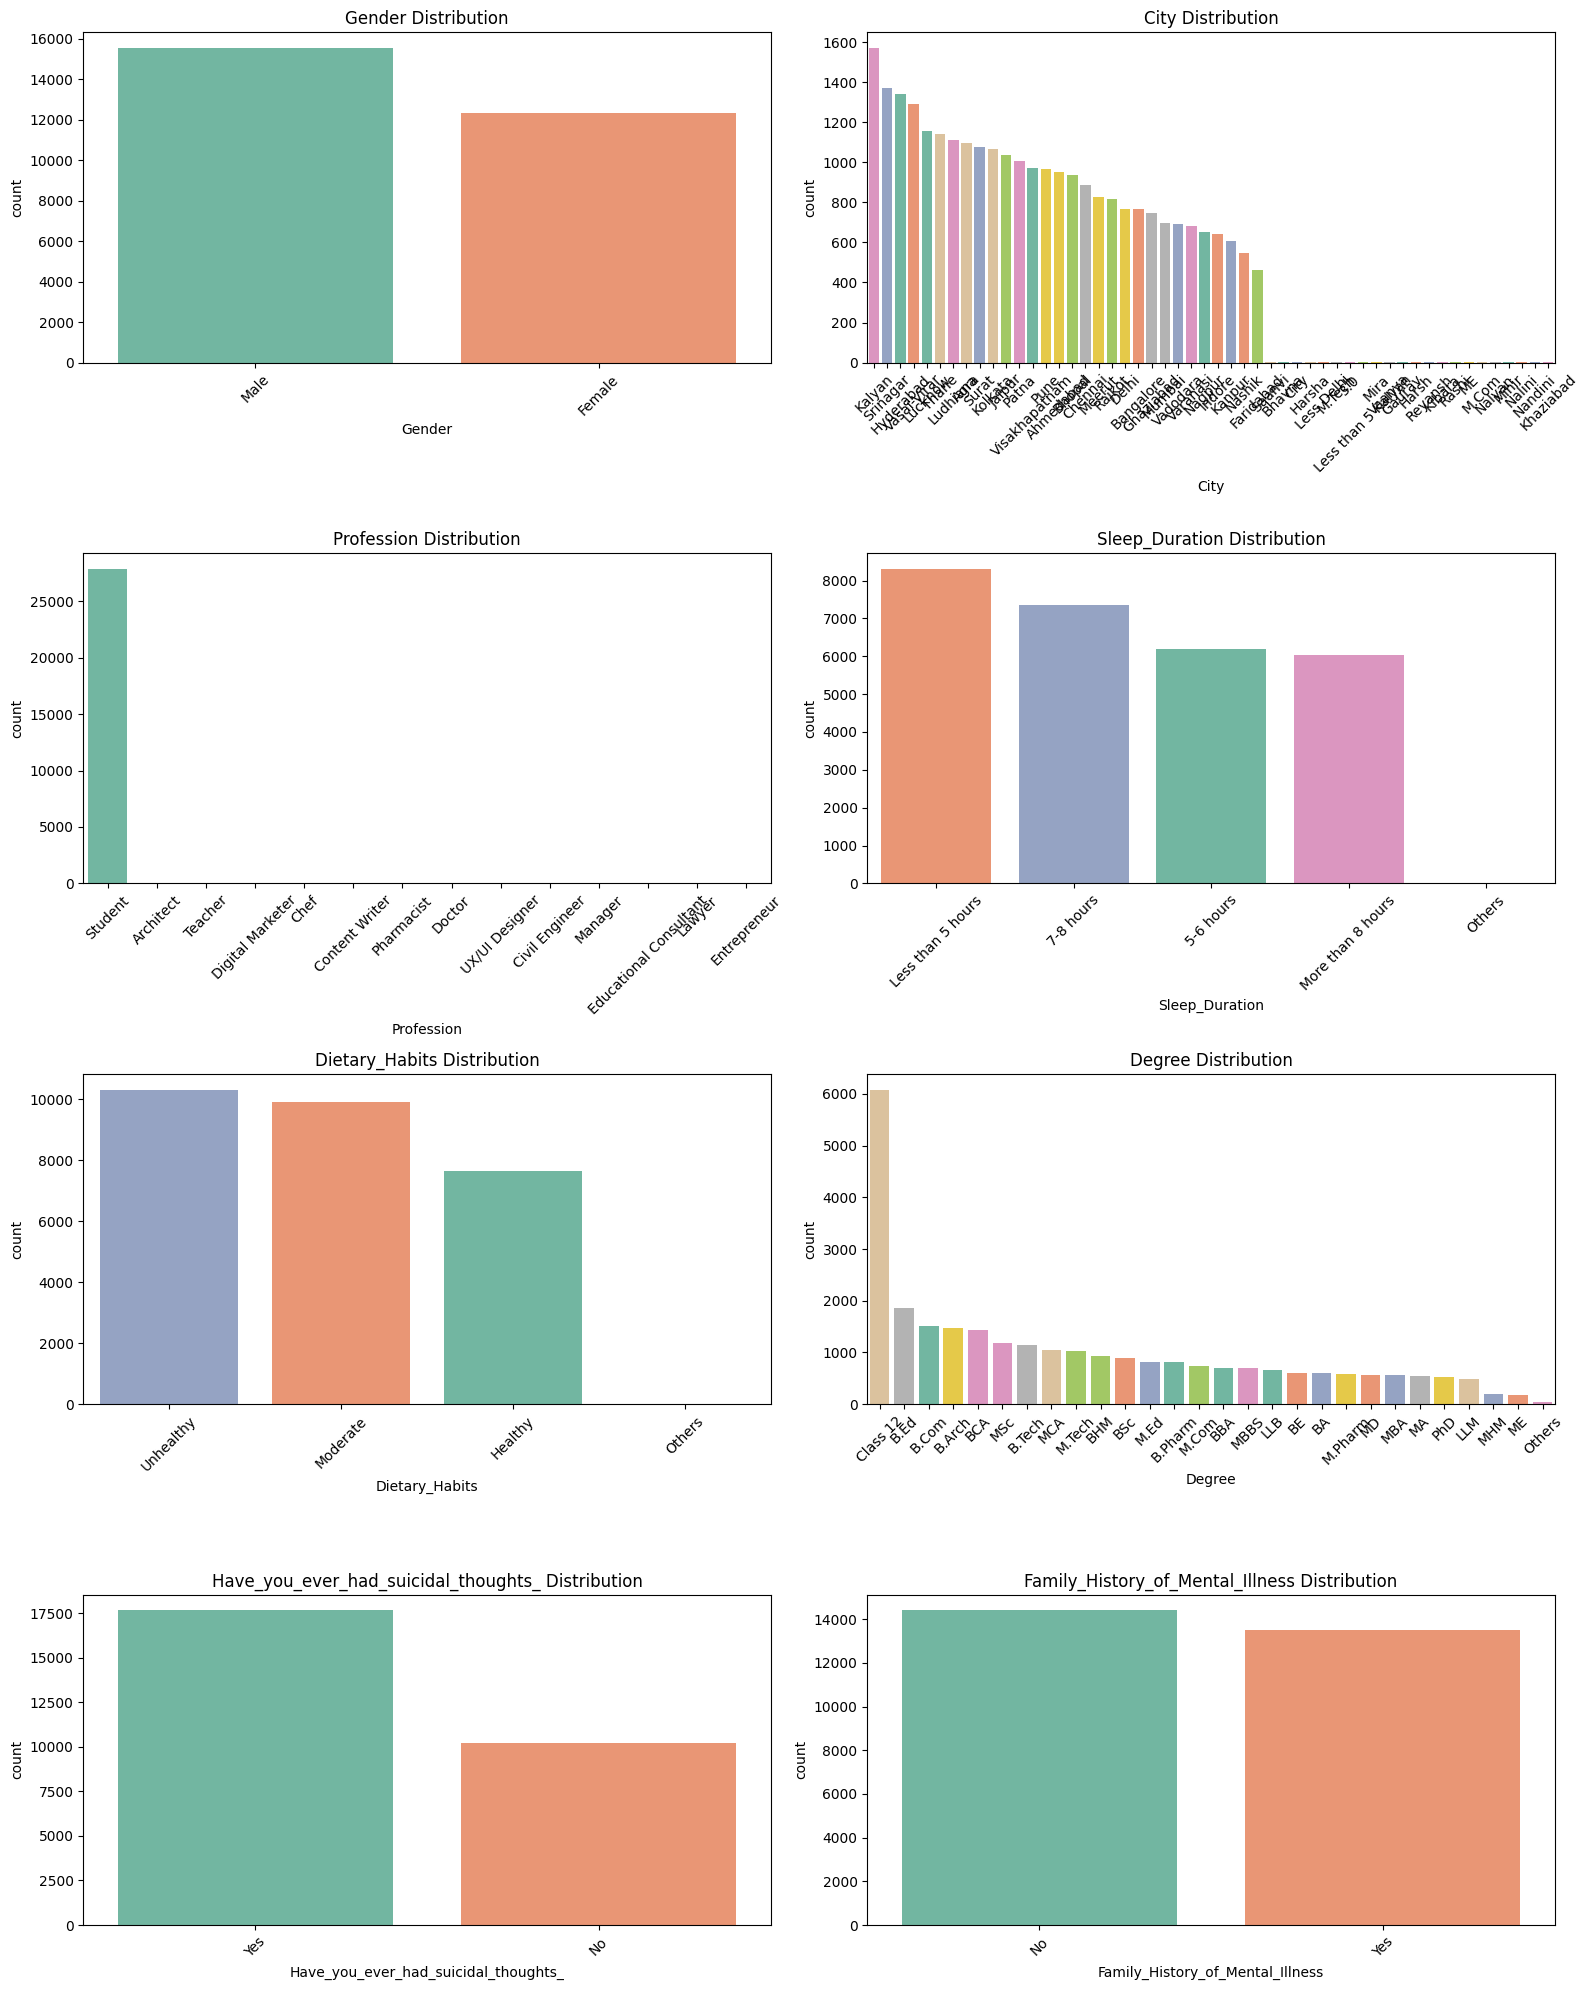

In [16]:
# Categorical Columns
cat_cols = [
    'Gender', 'City', 'Profession', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
    'Have_you_ever_had_suicidal_thoughts_', 'Family_History_of_Mental_Illness'
]

plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col,hue=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

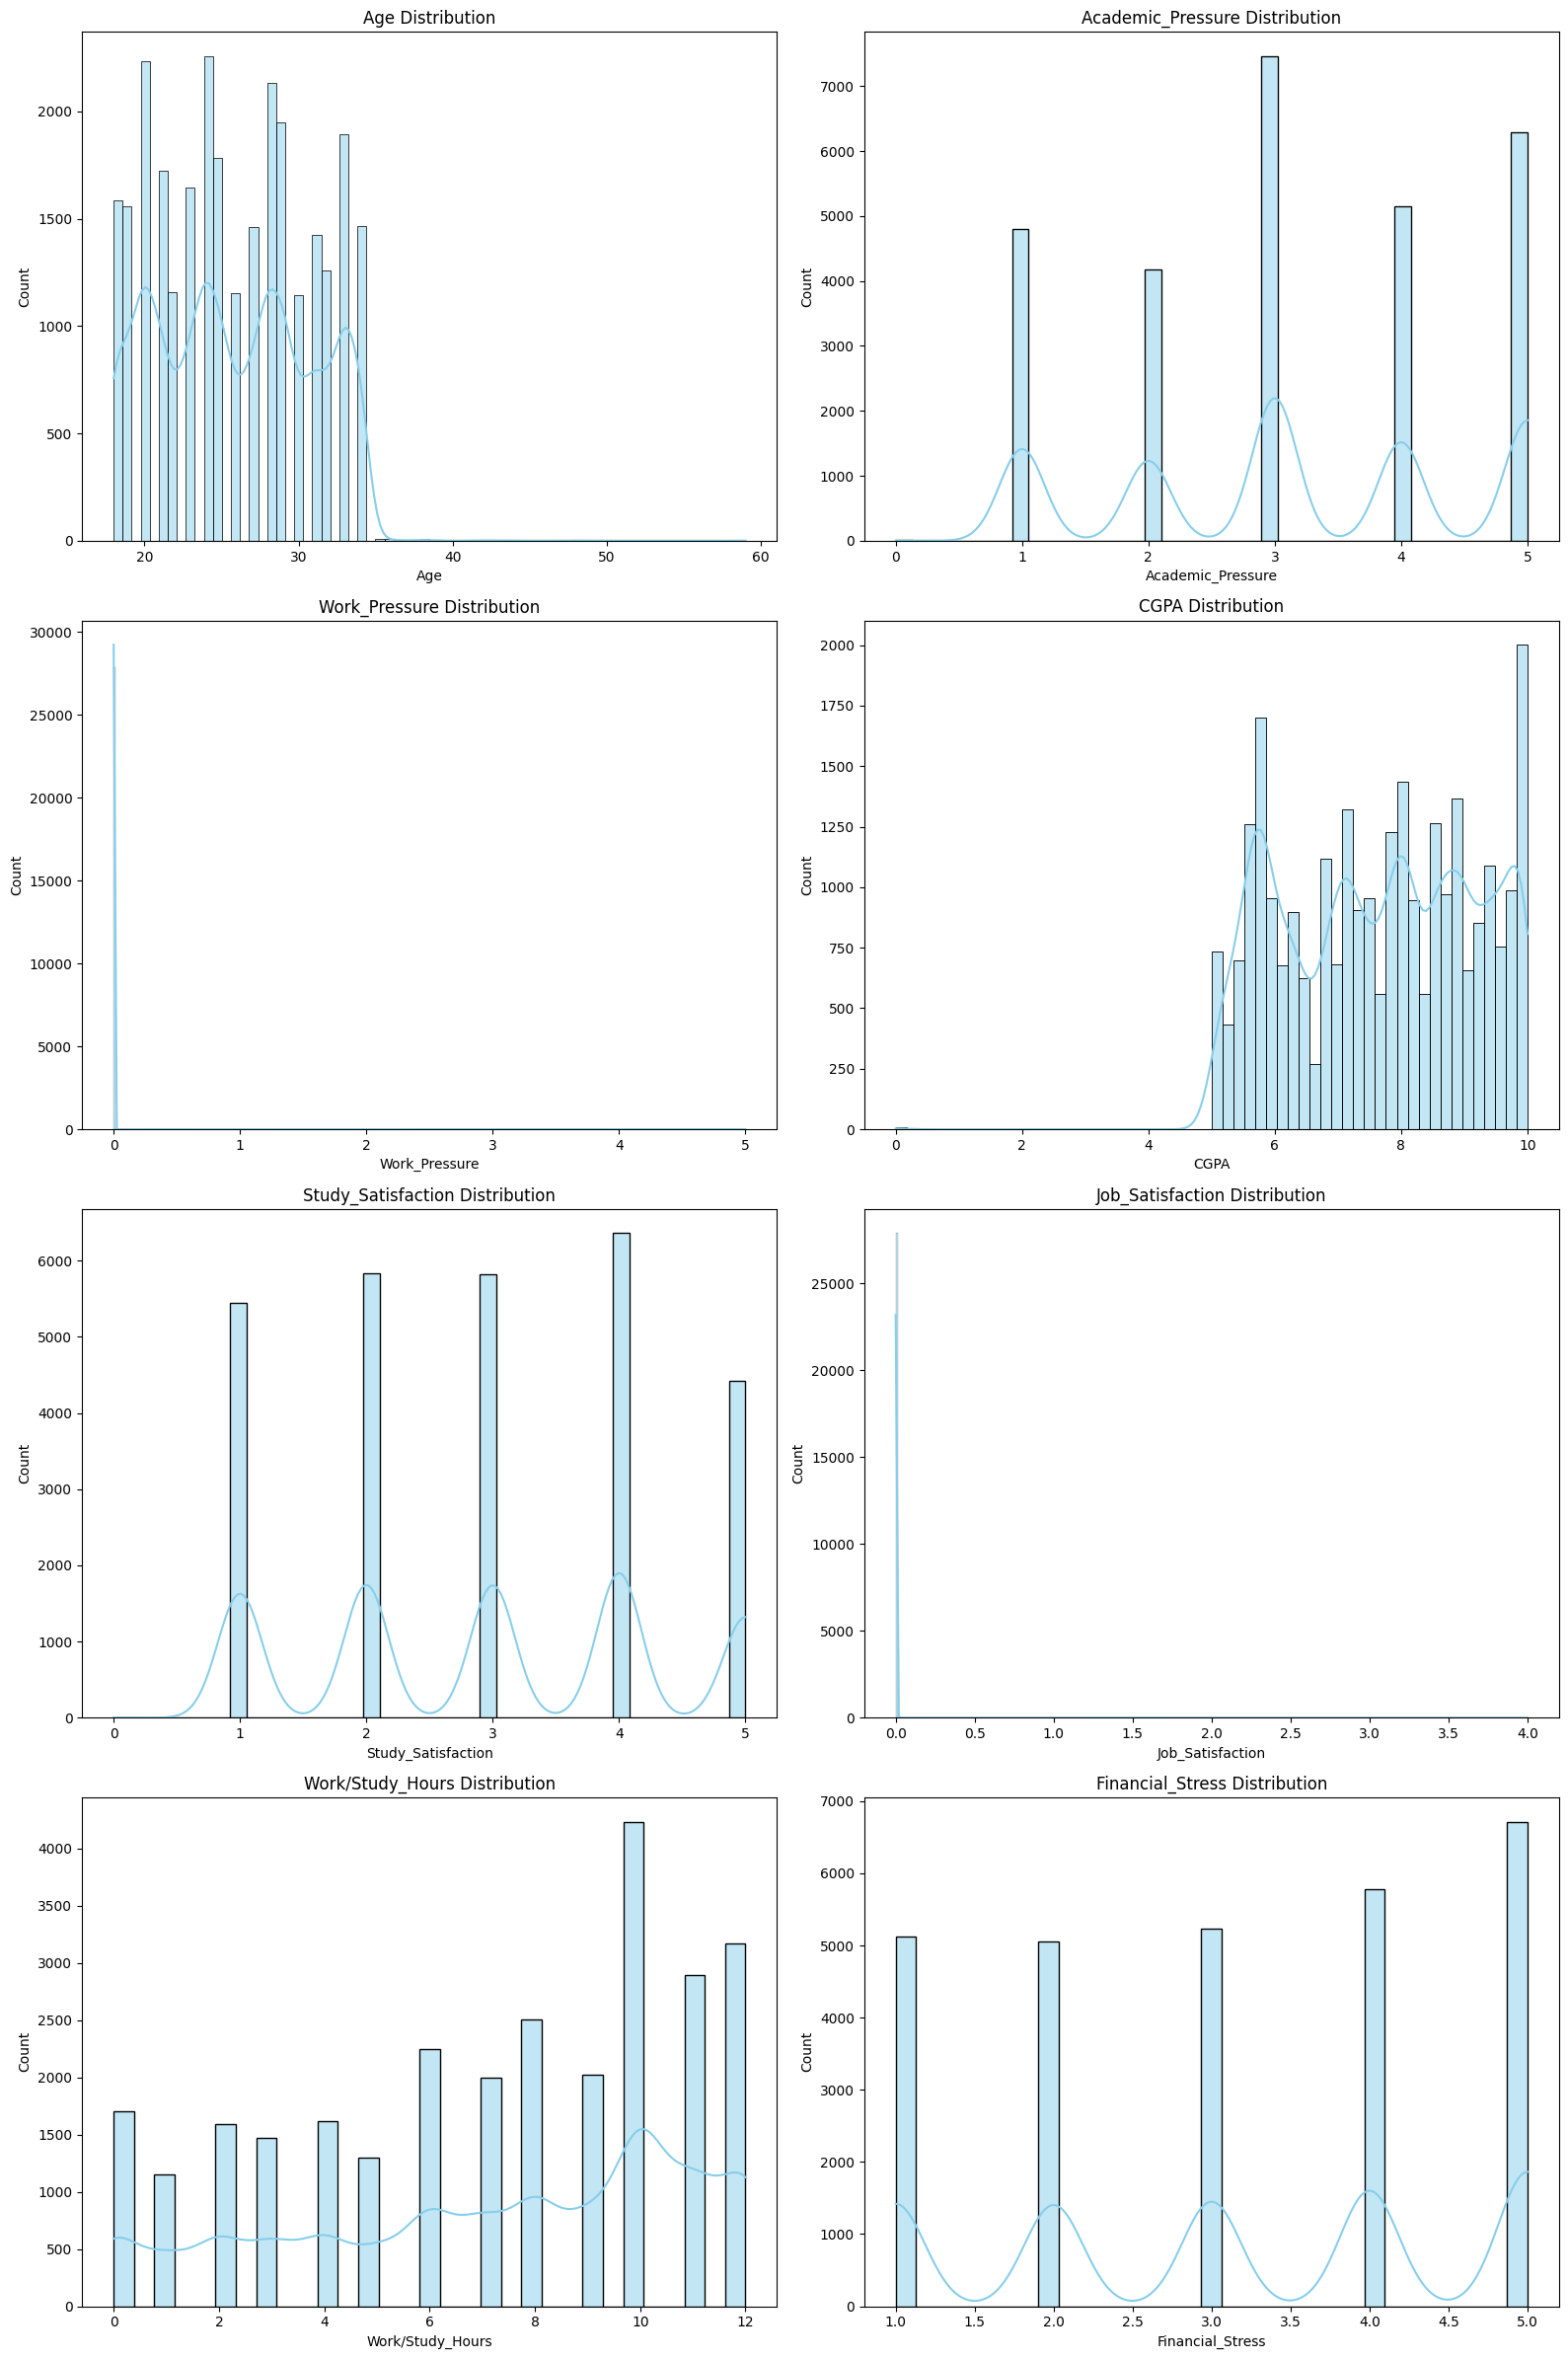

In [17]:
# Numerical Columns
num_cols = [
    'Age', 'Academic_Pressure', 'Work_Pressure', 'CGPA',
    'Study_Satisfaction', 'Job_Satisfaction',
    'Work/Study_Hours', 'Financial_Stress'
]

plt.figure(figsize=(16, 24))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

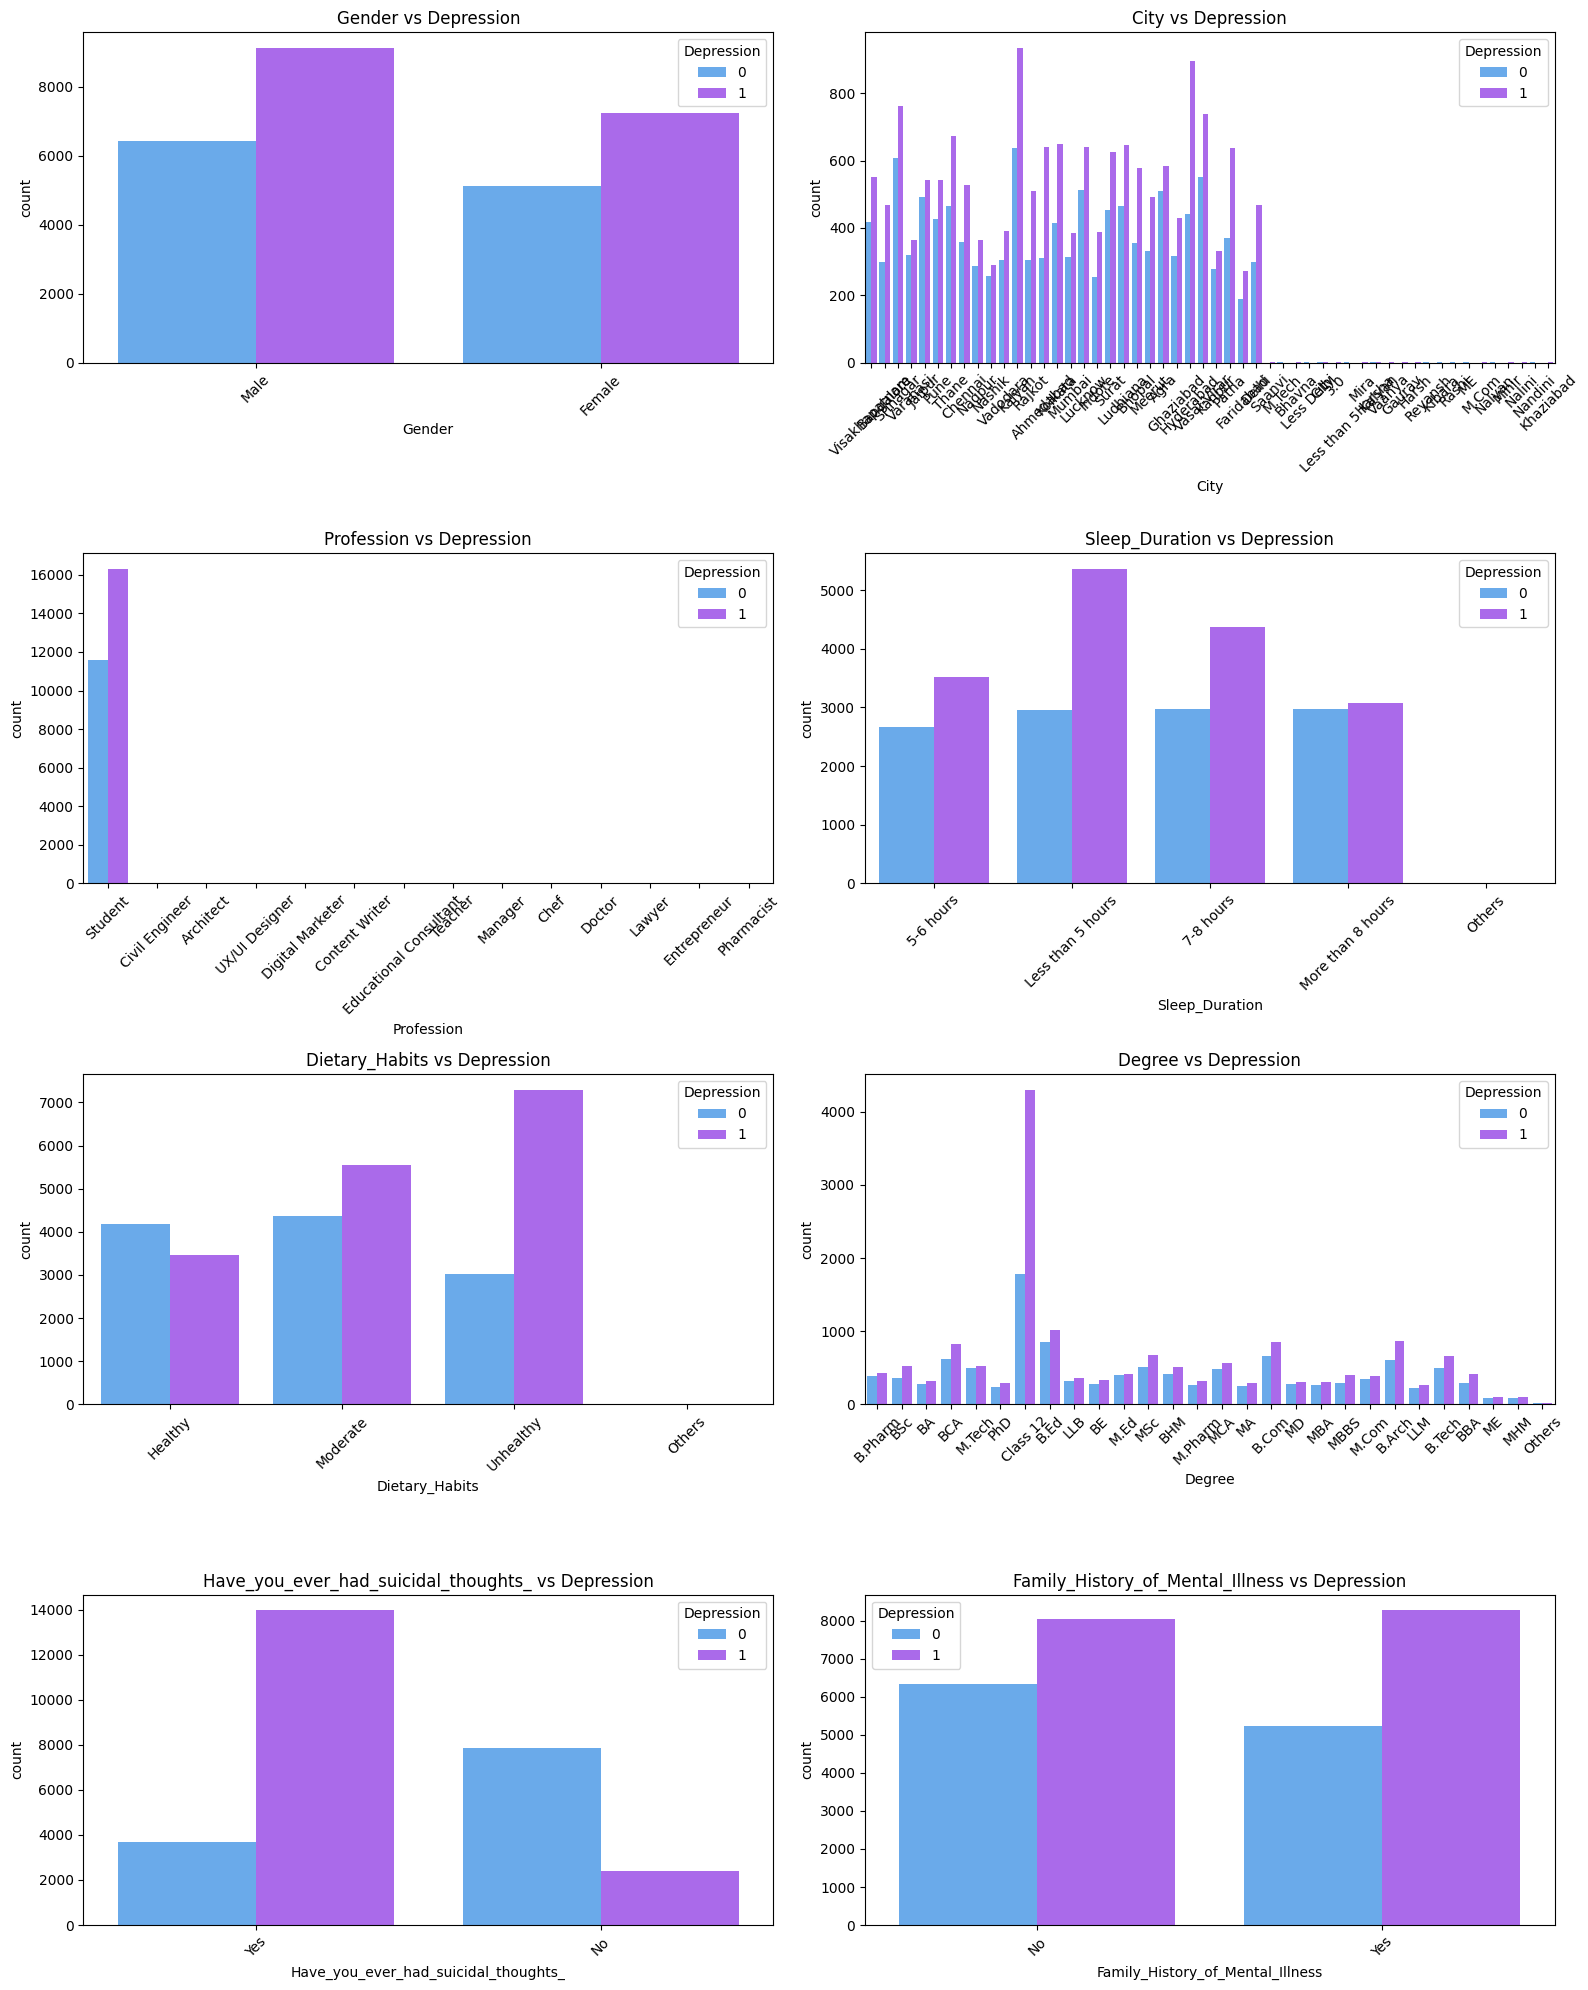

In [18]:
# Categorical vs Depression
plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='Depression', palette='cool')
    plt.title(f"{col} vs Depression")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

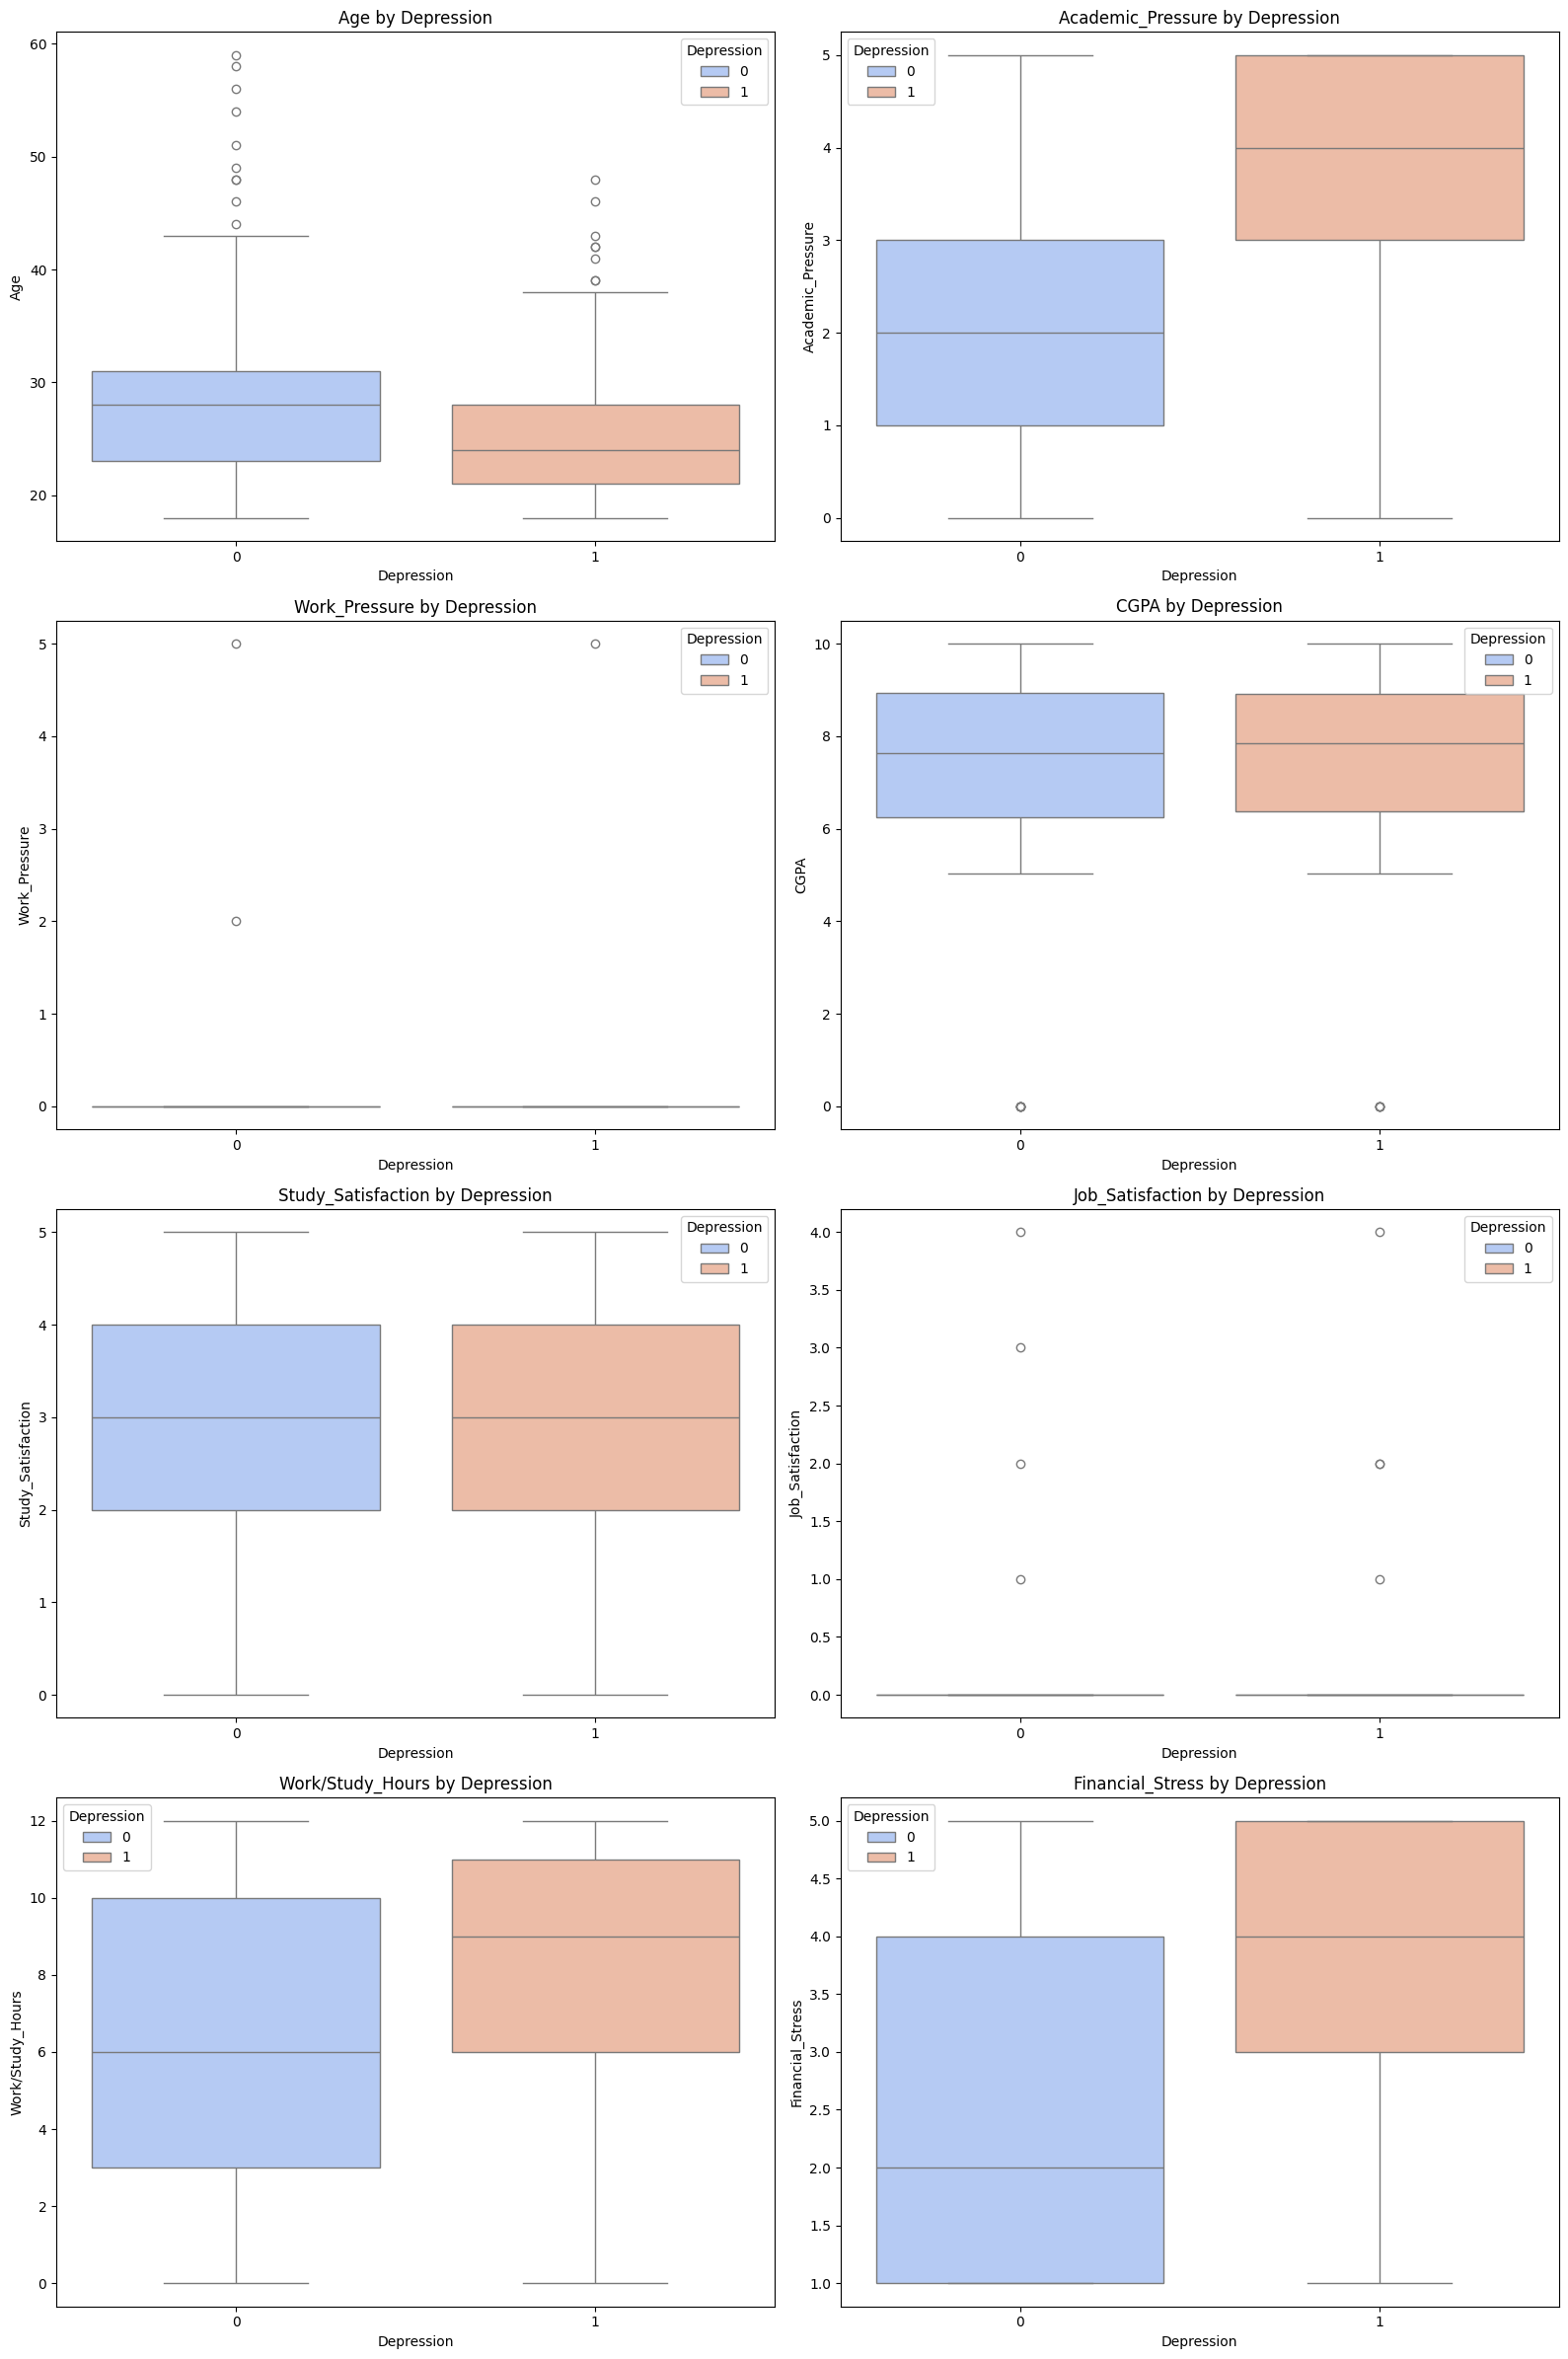

In [19]:
# Numerical vs Depression (Boxplots)
plt.figure(figsize=(16, 24))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x='Depression', y=col, hue='Depression', palette='coolwarm')
    plt.title(f"{col} by Depression")
plt.tight_layout()
plt.show()

<Axes: xlabel='Age'>

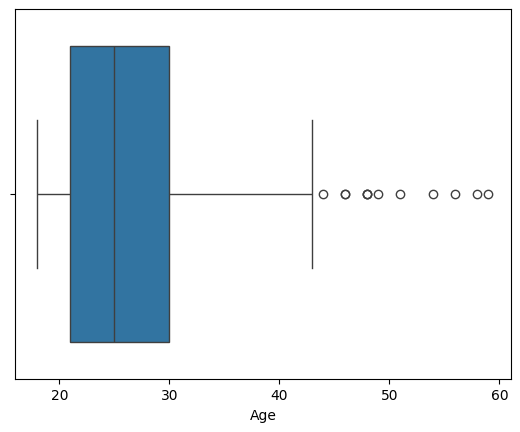

In [20]:
# There are many outliers in the age column
# checking outliers of age
sns.boxplot(x=df['Age'])

In [21]:
# hope to remove outliers using IQR method
# if the values are outside the upper or lower bound we replace that value with the nearest bound value 

def remove_outliers_age(text):
    q1 = df['Age'].quantile(0.25)
    q3 = df['Age'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    if text > upper_bound:
        return upper_bound
    elif text < lower_bound:
        return lower_bound
    else:
        return text

df['Age'] = df['Age'].apply(remove_outliers_age)

<Axes: xlabel='Age'>

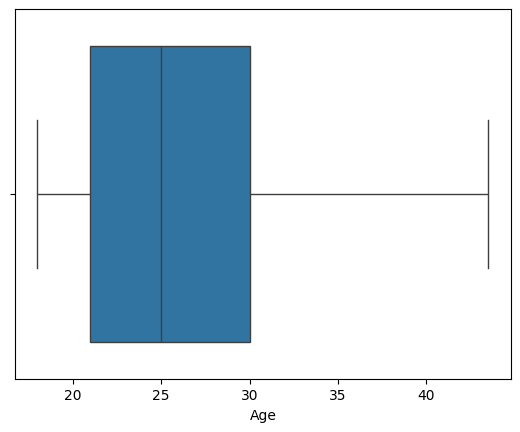

In [22]:
#check the progress of remove outliers
sns.boxplot(x=df['Age'])

In [23]:
# Again check the first 5 rows
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [24]:
# if no depression it equals to 0  & if have depression it equals to 1
no_depression = df[df['Depression'] == 0]
depression = df[df['Depression'] == 1]

In [25]:
# only no depression students
no_depression.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0


In [26]:
# only depression students
depression.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,5-6 hours,Moderate,Class 12,Yes,11.0,1.0,Yes,1


In [27]:
# univariable analysis
# counts function or count plot or pie plot for categorical variable
# For the numerical we will use the distplot or histplot
depression['Gender'].value_counts()

Gender
Male      9115
Female    7220
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

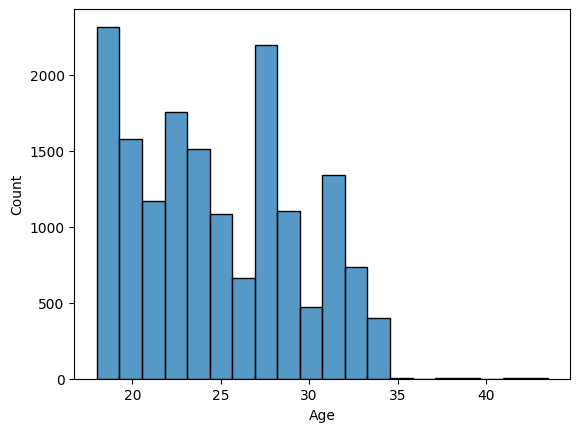

In [28]:
# males are most tend to be depressed than females
sns.histplot(depression['Age'], bins=20)

In [29]:
depression['City'].value_counts()
# after executing the above code we can see that the most depressed city is Kalyan

City
Kalyan           934
Hyderabad        897
Srinagar         763
Vasai-Virar      739
Thane            673
Kolkata          649
Ludhiana         647
Lucknow          641
Ahmedabad        640
Patna            636
Surat            625
Agra             585
Bhopal           579
Visakhapatnam    552
Jaipur           543
Pune             541
Chennai          528
Rajkot           511
Meerut           493
Delhi            468
Bangalore        467
Ghaziabad        428
Vadodara         390
Indore           389
Mumbai           386
Varanasi         363
Nagpur           363
Kanpur           330
Nashik           289
Faridabad        271
Saanvi             2
Bhavna             2
City               1
3.0                1
Mira               1
Harsha             1
Vaanya             1
Gaurav             1
Harsh              1
M.Com              1
Mihir              1
Nalini             1
Khaziabad          1
Name: count, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

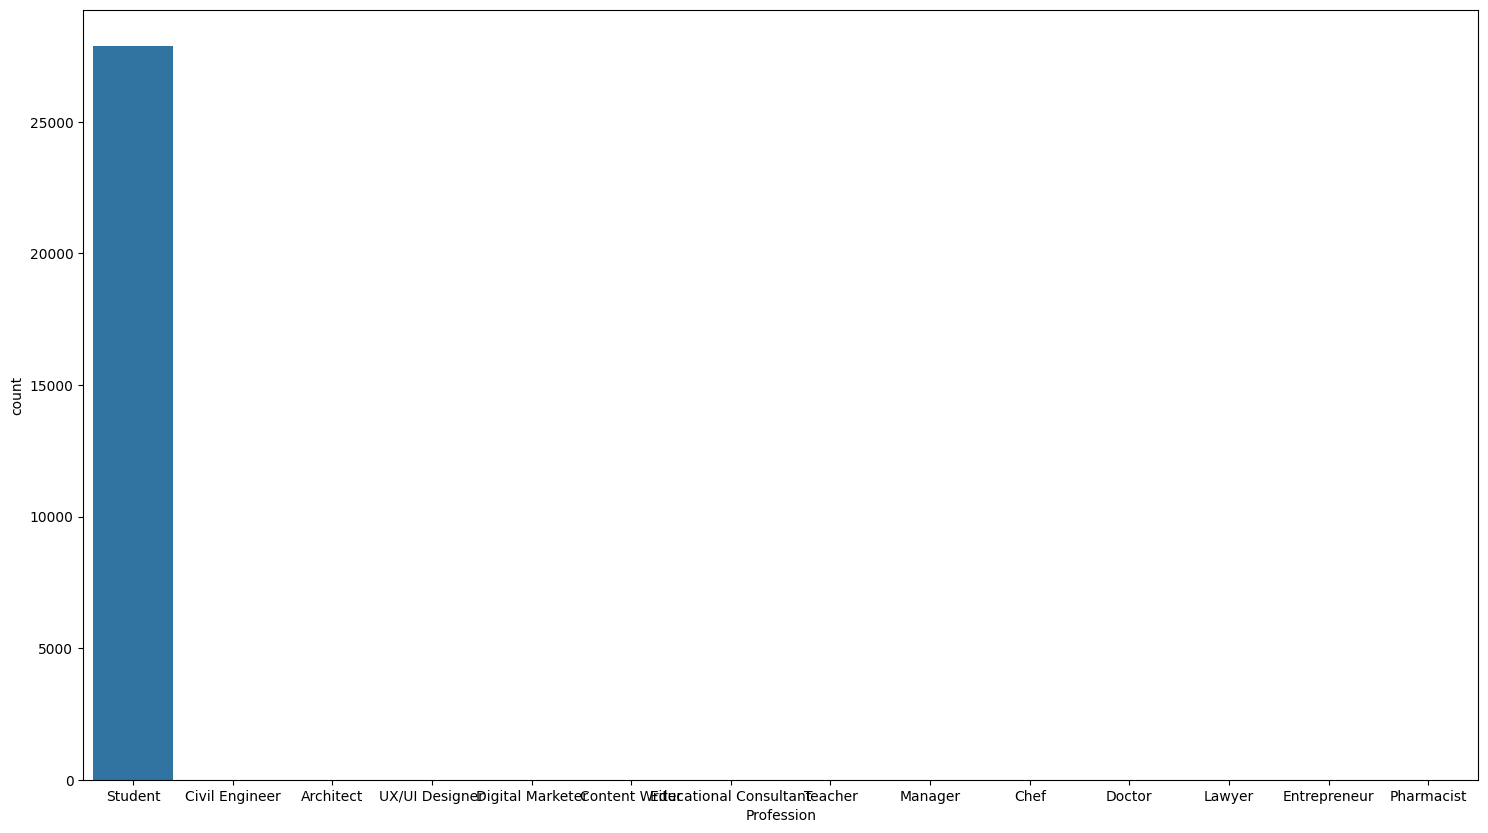

In [30]:
plt.figure(figsize=(18,10))
sns.countplot(x=df['Profession'])


In [31]:
depression['Profession'].value_counts()
# we can clearly see that the most depressed profession is student

Profession
Student                   16307
Architect                     7
Teacher                       5
Content Writer                2
Chef                          2
Digital Marketer              2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

Value Count - Profession


Profession
Student                   16307
Architect                     7
Teacher                       5
Content Writer                2
Chef                          2
Digital Marketer              2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

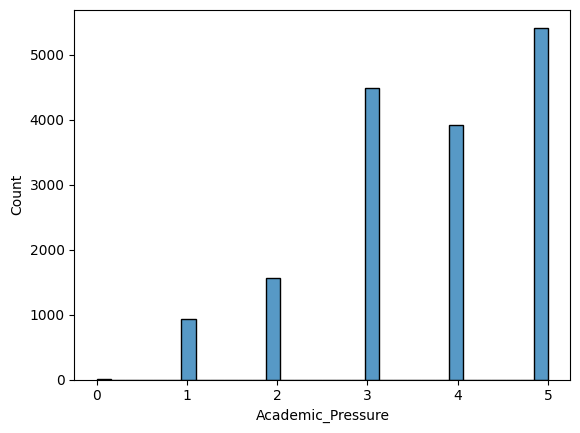

In [32]:
sns.histplot(depression['Academic_Pressure'])
print("Value Count - Profession")
depression['Profession'].value_counts()

Value Counts - Work/Study_Hours


Work/Study_Hours
10.0    2979
12.0    2168
11.0    1960
8.0     1568
6.0     1288
9.0     1214
7.0     1176
4.0      815
5.0      706
3.0      697
2.0      696
0.0      604
1.0      464
Name: count, dtype: int64

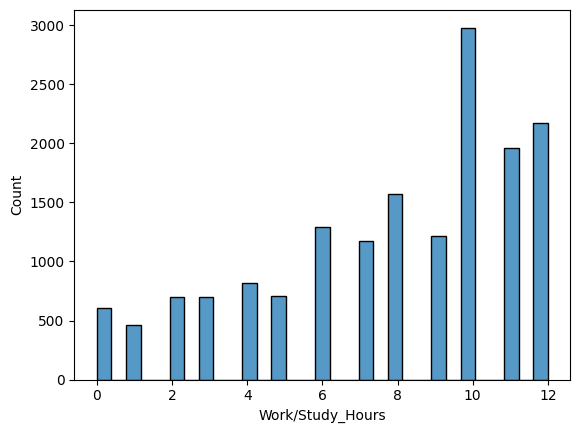

In [33]:
sns.histplot(depression['Work/Study_Hours'])
print("Value Counts - Work/Study_Hours")
depression['Work/Study_Hours'].value_counts()

Value Counts - CGPA


CGPA
8.0400    533
9.9600    274
8.9500    232
5.7400    222
9.2100    212
         ... 
7.6500      1
7.7800      1
6.6400      1
7.0625      1
6.4400      1
Name: count, Length: 325, dtype: int64

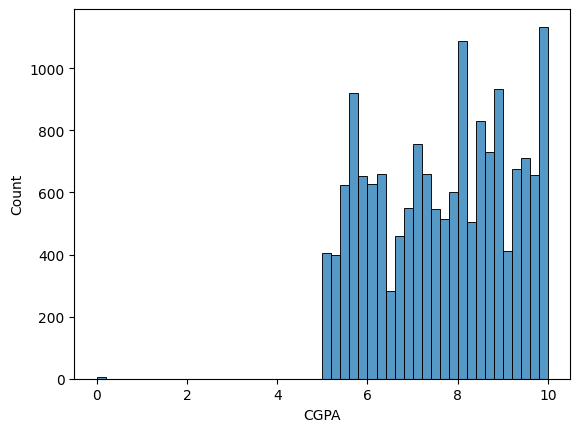

In [34]:
sns.histplot(depression['CGPA'])
print("Value Counts - CGPA")
depression['CGPA'].value_counts()

Value Counts - Study_Satisfaction


Study_Satisfaction
1.0    3856
2.0    3768
3.0    3353
4.0    3264
5.0    2088
0.0       6
Name: count, dtype: int64

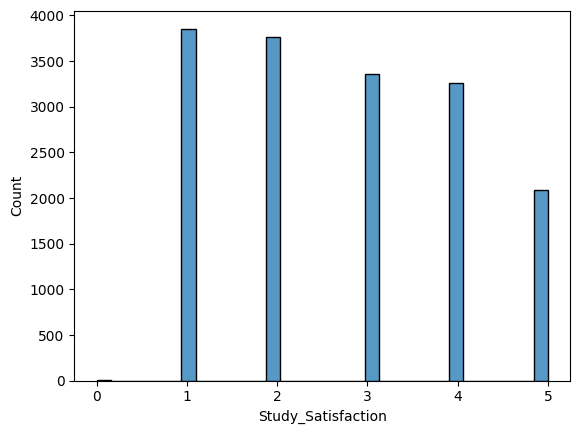

In [35]:
sns.histplot(depression['Study_Satisfaction'])
print("Value Counts - Study_Satisfaction")
depression['Study_Satisfaction'].value_counts()

Value Counts - Job_Satisfaction


Job_Satisfaction
0.0    16331
2.0        2
1.0        1
4.0        1
Name: count, dtype: int64

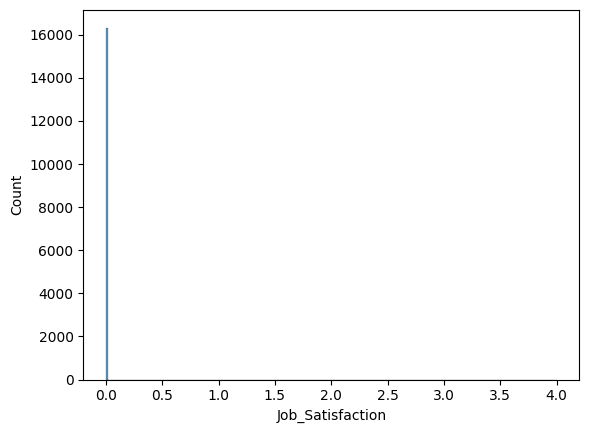

In [36]:
sns.histplot(depression['Job_Satisfaction'])
print("Value Counts - Job_Satisfaction")
depression['Job_Satisfaction'].value_counts()
# in our data set most of them are students thats whys the job satisfaction is mostly 0
# so we can remove that

Value Counts - Sleep_Duration


Sleep_Duration
Less than 5 hours    5361
7-8 hours            4371
5-6 hours            3516
More than 8 hours    3078
Others                  9
Name: count, dtype: int64

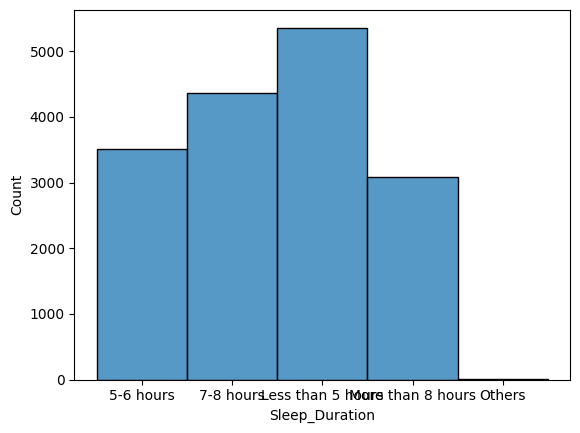

In [37]:
sns.histplot(depression['Sleep_Duration'])
print("Value Counts - Sleep_Duration")
depression['Sleep_Duration'].value_counts()

Value Counts - Dietary_Habits


Dietary_Habits
Unhealthy    7297
Moderate     5558
Healthy      3472
Others          8
Name: count, dtype: int64

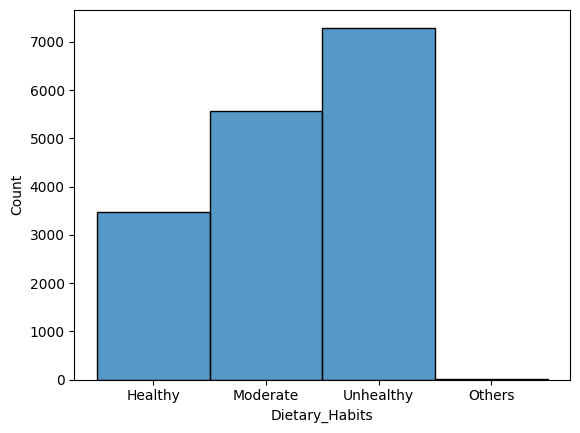

In [38]:
# if a person is tend to be healthy they are less depressed
sns.histplot(depression['Dietary_Habits'])
print("Value Counts - Dietary_Habits")
depression['Dietary_Habits'].value_counts()

Value Counts - Degree


Degree
Class 12    4303
B.Ed        1021
B.Arch       871
B.Com        853
BCA          818
MSc          679
B.Tech       655
MCA          559
BSc          523
M.Tech       521
BHM          509
B.Pharm      428
M.Ed         415
BBA          407
MBBS         404
M.Com        390
LLB          356
BE           334
BA           321
M.Pharm      314
MBA          303
MD           298
MA           290
PhD          286
LLM          259
MHM           99
ME            98
Others        21
Name: count, dtype: int64

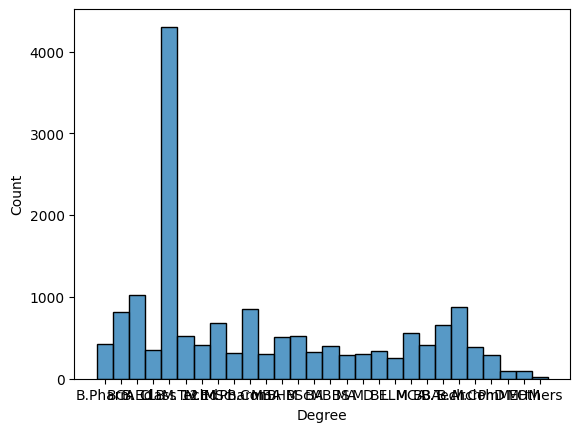

In [39]:
sns.histplot(depression['Degree'])
print("Value Counts - Degree")
depression['Degree'].value_counts()

Value Counts -Financial_Stress


Financial_Stress
5.0    5458
4.0    3990
3.0    3080
2.0    2175
1.0    1632
Name: count, dtype: int64

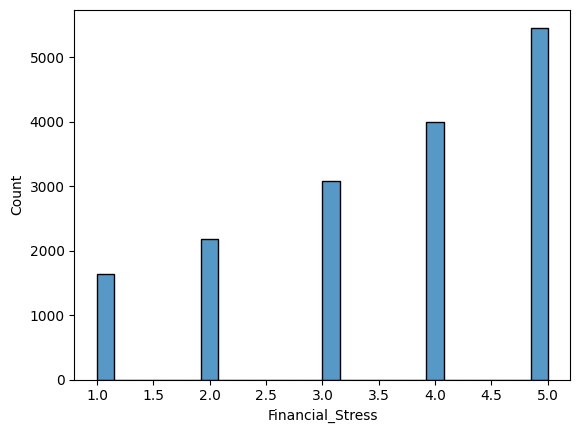

In [40]:
sns.histplot(depression['Financial_Stress'])
print("Value Counts -Financial_Stress")
depression['Financial_Stress'].value_counts()

In [41]:
depression['Have_you_ever_had_suicidal_thoughts_'].value_counts()
# almost 90% people tend to have depression who ever had suicidal thoughts

Have_you_ever_had_suicidal_thoughts_
Yes    13957
No      2378
Name: count, dtype: int64

<Axes: xlabel='Family_History_of_Mental_Illness', ylabel='Count'>

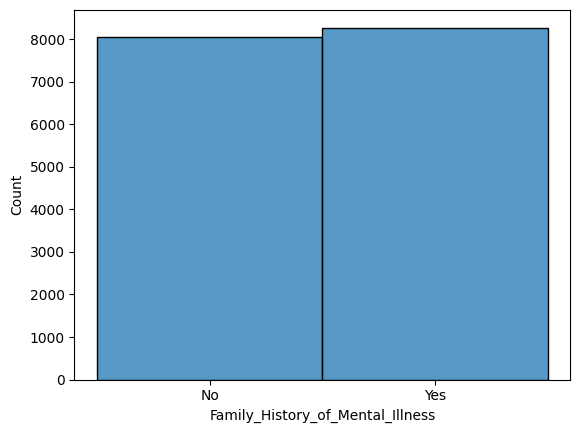

In [42]:
sns.histplot(depression['Family_History_of_Mental_Illness'])

# 1St Evaluation, Feature Engineering and Model Traing

In [43]:
# Label Encoder 
from sklearn.preprocessing import LabelEncoder
# calling object
lable = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    df[column] = lable.fit_transform(categorical_columns[column])

categorical_columns.head()

,Gender,City,Profession,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Family_History_of_Mental_Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No


In [44]:
df.rename(columns={'Have_you_ever_had_suicidal_thoughts_': 'Suicidal Thoughts'}, inplace=True)

In [45]:
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal Thoughts,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [46]:
df.rename(columns={'Family_History_of_Mental_Illness': 'Mental Illness History'}, inplace=True)
df.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal Thoughts,Work/Study_Hours,Financial_Stress,Mental Illness History,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [47]:
df.corr()['Depression']

id                        0.000986
Gender                    0.001819
Age                      -0.226533
City                     -0.024878
Profession               -0.016437
Academic_Pressure         0.474793
Work_Pressure            -0.003351
CGPA                      0.022268
Study_Satisfaction       -0.168010
Job_Satisfaction         -0.003483
Sleep_Duration           -0.022412
Dietary_Habits            0.206673
Degree                   -0.015011
Suicidal Thoughts         0.546290
Work/Study_Hours          0.208627
Financial_Stress          0.363591
Mental Illness History    0.053554
Depression                1.000000
Name: Depression, dtype: float64

<Axes: >

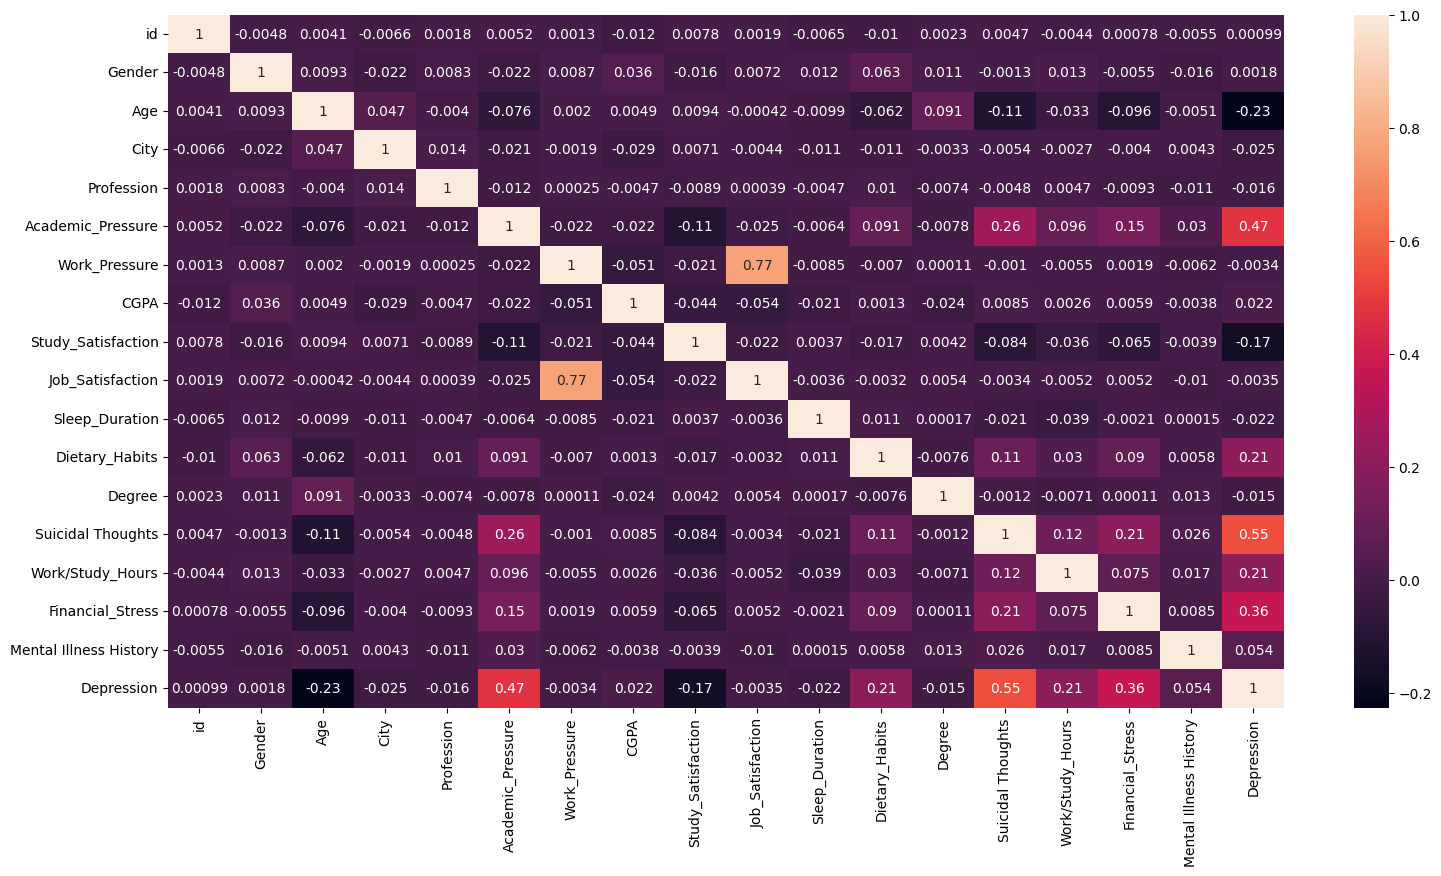

In [48]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True)

In [49]:
#Lets drop id and work pressre columns
df.drop(['id', 'Work_Pressure'], axis=1, inplace=True)

In [50]:
df.head()

,Gender,Age,City,Profession,Academic_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal Thoughts,Work/Study_Hours,Financial_Stress,Mental Illness History,Depression
0,1,33.0,51,11,5.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,3,11,2.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,44,11,3.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,49,11,3.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,16,11,4.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [51]:
df.shape

(27898, 16)

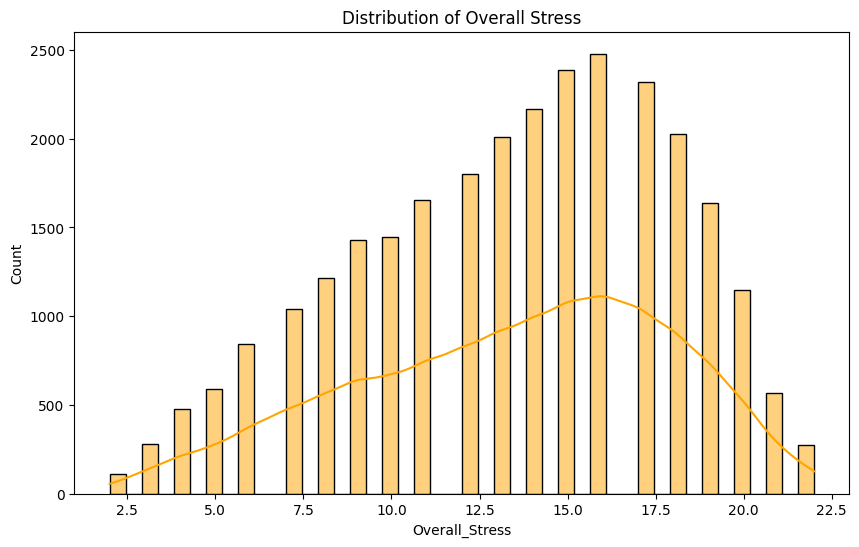

In [52]:
# Feature Engineering Create a new feature 'Overall_Stress'
# this is a assumption  
df['Overall_Stress'] = df['Academic_Pressure'] + df['Work/Study_Hours'] + df['Financial_Stress']

# Check the distribution of the new feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall_Stress'], kde=True, color='orange')
plt.title("Distribution of Overall Stress")
plt.show()


Train the model

In [53]:
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('Depression', axis=1)  # Assuming 'Depression' is the target column
y = df['Depression']

In [55]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For ROC curve and Precision-Recall curve


In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.36%


In [59]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2348
           1       0.79      0.80      0.80      3232

    accuracy                           0.76      5580
   macro avg       0.76      0.76      0.76      5580
weighted avg       0.76      0.76      0.76      5580



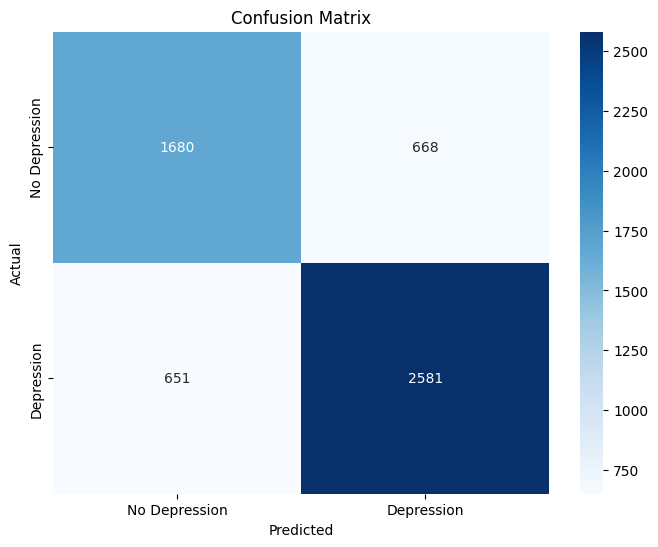

In [60]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.2f}")


Cross-validation scores: [0.75896057 0.76989247 0.76702509 0.7635777  0.76196451]
Mean cross-validation accuracy: 76.43%
Standard deviation of cross-validation scores: 0.00


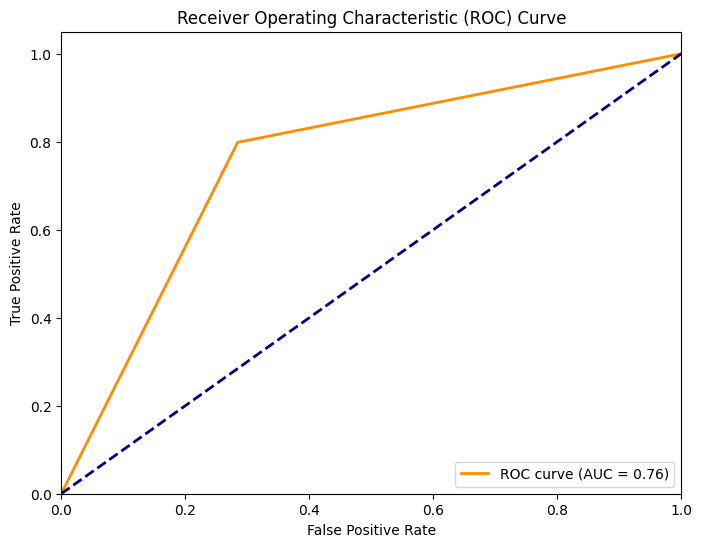

In [62]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

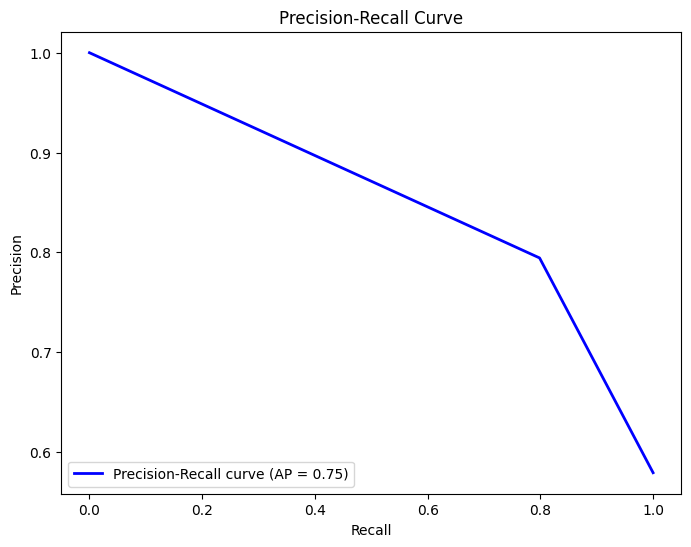

In [63]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# HyperParameter Tuning and 2nd Evluation

In [64]:
# hope to use GridSearchCV to  hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

understad the key hyper parameters

* max_depth --> define the max depth of the tree 
* min_sample_split --> define the min sample split required to split a node
* min_sample_leaf --> define the min sample leaf required to split a node
* max_features --> define the max features to consider at each split
* splitter -->  strategy split at each node. 
* criterion --> use to measure the quality of the split

In [65]:
#  parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],    
    'max_features': ['sqrt', 'log2', None], 
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'] 
}

In [66]:
# use GridSearchCV to tune the hyperparameters
# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

# apply GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search: ⏭️")
print(grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters from Grid Search: ⏭️
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [67]:
# re train the model with best hyperparameters
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'random'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
# find accuracy of the model
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.90%


Improve model accuracy from 76% to 83%  by using hyper parameter tuning 

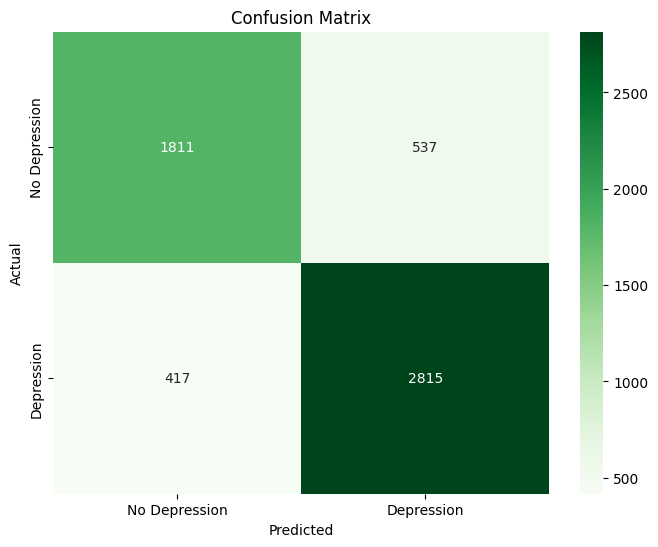

In [72]:
# Confusion Matrix again
cm = confusion_matrix(y_test, y_pred)

# Plot CM
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report

from sklearn.metrics import classification_report  

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2348
           1       0.84      0.87      0.86      3232

    accuracy                           0.83      5580
   macro avg       0.83      0.82      0.82      5580
weighted avg       0.83      0.83      0.83      5580



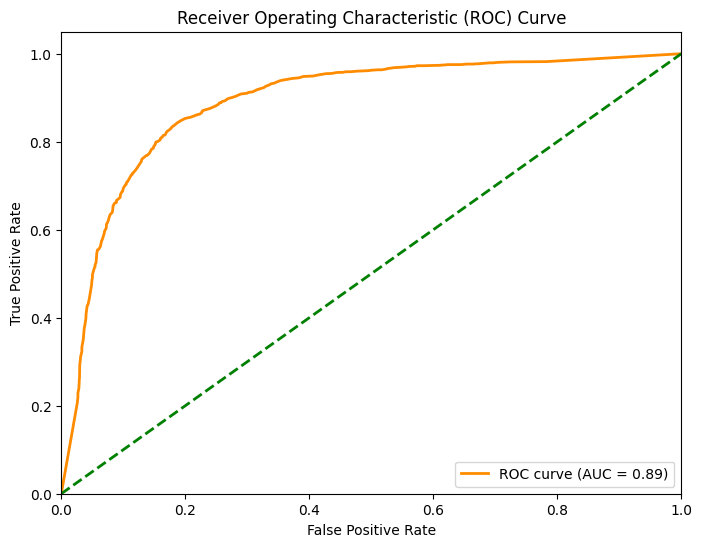

In [ ]:
# Roc auc aurve
from sklearn.metrics import roc_curve, auc


y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

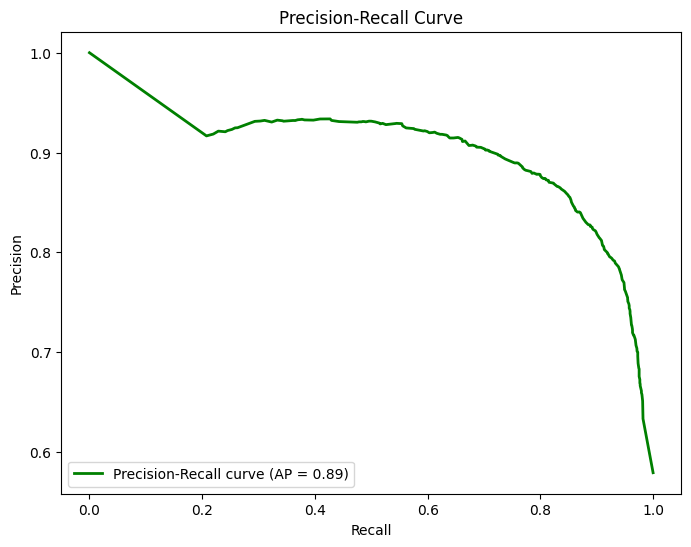

In [76]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
